In [15]:
import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np

In [6]:
df1 = DataFrame({'key':['b','b','a','c','a','a','b'], 'data1':range(7)})
df2 = DataFrame({'key':['a','b','d'], 'data2':range(3)})
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [7]:
df2

,data2,key
0,0,a
1,1,b
2,2,d


In [8]:
pd.merge(df1, df2, on='key')

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [9]:
pd.merge(df1,df2, how='outer')

,data1,key,data2
0,0.0,b,1.0
1,1.0,b,1.0
2,6.0,b,1.0
3,2.0,a,0.0
4,4.0,a,0.0
5,5.0,a,0.0
6,3.0,c,NaN
7,NaN,d,2.0


In [10]:
pd.merge(df1, df2, on='key', how='left')

,data1,key,data2
0,0,b,1.0
1,1,b,1.0
2,2,a,0.0
3,3,c,NaN
4,4,a,0.0
5,5,a,0.0
6,6,b,1.0


In [11]:
pd.merge(df1, df2, on='key', how='inner')

,data1,key,data2
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [12]:
right1 = DataFrame({'group_val':[3.5,7]}, index=['a','b'])
pd.merge(df1, right1, left_on='key', right_index=True)

,data1,key,group_val
0,0,b,7.0
1,1,b,7.0
6,6,b,7.0
2,2,a,3.5
4,4,a,3.5
5,5,a,3.5


In [14]:
arr = np.arange(12).reshape((3,4))
np.concatenate([arr,arr], axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [16]:
s1 = Series([0,1], index=['a','b'])
s2 = Series([2,3,4], index=['c','d','e'])
s3 = Series([5,6], index=['f','g'])
pd.concat([s1,s2,s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [17]:
pd.concat([s1,s2,s3],axis=1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [18]:
result = pd.concat([s1,s2,s3], keys=['one','two','three'])
result

one    a    0
       b    1
two    c    2
       d    3
       e    4
three  f    5
       g    6
dtype: int64

In [19]:
result.unstack()

,a,b,c,d,e,f,g
one,0.0,1.0,NaN,NaN,NaN,NaN,NaN
two,NaN,NaN,2.0,3.0,4.0,NaN,NaN
three,NaN,NaN,NaN,NaN,NaN,5.0,6.0


In [20]:
pd.concat([s1,s2,s3], axis=1,keys=['one','two','three'])

,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


stack: 将列旋转为行
unstck: 将行旋转为列

In [21]:
data = DataFrame(np.arange(6).reshape((2,3)), index=pd.Index(['ohio', 'colorado'], name='state'), columns=pd.Index(['one','tow','three']))
data

,one,tow,three
state,,,
ohio,0,1,2
colorado,3,4,5


In [22]:
data.stack()

state          
ohio      one      0
          tow      1
          three    2
colorado  one      3
          tow      4
          three    5
dtype: int32

In [23]:
data.unstack()

       state   
one    ohio        0
       colorado    3
tow    ohio        1
       colorado    4
three  ohio        2
       colorado    5
dtype: int32

In [ ]:
#pivot

In [30]:
data['four'] = data['tow'].map(np.sqrt)
data

,one,tow,three,four
state,,,,
ohio,0,1,2,1.0
colorado,3,4,5,2.0


In [32]:
np.random.seed(12345)
data = DataFrame(np.random.randn(1000,4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067684,0.067924,0.025598,-0.002298
std,0.998035,0.992106,1.006835,0.996794
min,-3.428254,-3.548824,-3.184377,-3.745356
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.366626,2.653656,3.260383,3.927528


In [33]:
col = data[3]
col[np.abs(col)>3]

97     3.927528
305   -3.399312
400   -3.745356
Name: 3, dtype: float64

In [34]:
data.head()

,0,1,2,3
0,-0.204708,0.478943,-0.519439,-0.555730
1,1.965781,1.393406,0.092908,0.281746
2,0.769023,1.246435,1.007189,-1.296221
3,0.274992,0.228913,1.352917,0.886429
4,-2.001637,-0.371843,1.669025,-0.438570


In [35]:
data[(np.abs(data)>3).any(1)]

,0,1,2,3
5,-0.539741,0.476985,3.248944,-1.021228
97,-0.774363,0.552936,0.106061,3.927528
102,-0.655054,-0.565230,3.176873,0.959533
305,-2.315555,0.457246,-0.025907,-3.399312
324,0.050188,1.951312,3.260383,0.963301
400,0.146326,0.508391,-0.196713,-3.745356
499,-0.293333,-0.242459,-3.056990,1.918403
523,-3.428254,-0.296336,-0.439938,-0.867165
586,0.275144,1.179227,-3.184377,1.369891
808,-0.362528,-3.548824,1.553205,-2.186301


In [36]:
# get_dummies cut离散化

In [37]:
val = 'a,b,   guido'
[x.strip() for x in val.split(',')]

['a', 'b', 'guido']

In [38]:
import json
db = json.load(open('d:/project/0/src/python/pydata-book-master/ch07/foods-2011-10-03.json'))

In [39]:
len(db)

6636

In [40]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [41]:
db[0]['nutrients'][0]

{'description': 'Protein',
 'group': 'Composition',
 'units': 'g',
 'value': 25.18}

In [42]:
nutrients = DataFrame(db[0]['nutrients'])
nutrients[:7]

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00


In [45]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = DataFrame(db, columns=info_keys)
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [46]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Fast Foods                           365
Legumes and Legume Products          365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

In [47]:
nutrients = []
for rec in db:
    fnuts = DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)
    
nutrients = pd.concat(nutrients, ignore_index=True)
nutrients.head()

,description,group,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008


In [48]:
nutrients = nutrients.drop_duplicates()
col_mapping = {'description':'food', 'group':'fgroup'}
info = info.rename(columns=col_mapping, copy=False)

In [49]:
col_mapping = {'description':'nutrient', 'group':'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
ndata = pd.merge(nutrients, info, on='id', how='outer')

In [50]:
ndata.iloc[3000]

nutrient                 Alcohol, ethyl
nutgroup                          Other
units                                 g
value                                 0
id                                 1159
food            Cheese, goat, soft type
fgroup           Dairy and Egg Products
manufacturer                           
Name: 3000, dtype: object

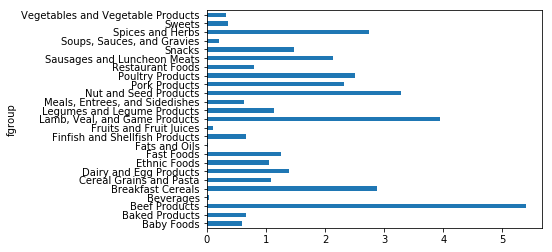

In [52]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
%matplotlib inline
result['Zinc, Zn'].sort_index().plot(kind='barh')